In [28]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [29]:
#Import data
df_gen=pd.read_excel(r"C:\Users\vishe\Downloads\(PRA)_(OFFG)_8350731_v_1_010242 - Analyst Data Science - Technical Assessment - Data.XLSX", header=None)

In [30]:
# Combine the first two rows to form the column names
columns = df_gen.iloc[0]+'_'+df_gen.iloc[1]
df_gen.columns = columns

# Drop the first two rows as they are now part of column names
df_gen = df_gen.drop([0, 1])

# Reset the index
df_gen = df_gen.reset_index(drop=True)

#Renmae first column
df_gen = df_gen.rename(columns={df_gen.columns[0]: 'Firms'})


In [31]:
# Melt the DataFrame
melted_df = pd.melt(df_gen, id_vars=['Firms'], var_name='Column_Year')

# Extract the year from the 'Column_Year' and create a new column for it
melted_df['Year'] = melted_df['Column_Year'].str.extract(r'(\d{4})')

# Extract the column prefix (e.g., 'NWP (£m)', 'SCR (£m)')
melted_df['Column'] = melted_df['Column_Year'].str.extract(r'([^\d]+)')

# Pivot the melted DataFrame to create separate columns for each prefix
df_gen = melted_df.pivot_table(index=['Firms', 'Year'], columns='Column', values='value').reset_index()



In [32]:
df_uw=pd.read_excel(r"C:\Users\vishe\Downloads\(PRA)_(OFFG)_8350731_v_1_010242 - Analyst Data Science - Technical Assessment - Data.XLSX", sheet_name='Dataset 2 - Underwriting', header=None)

# Combine the first two rows to form the column names
columns = df_uw.iloc[0]+'_'+df_uw.iloc[1]
df_uw.columns = columns

# Drop the first two rows as they are now part of column names
df_uw = df_uw.drop([0, 1])

# Reset the index
df_uw = df_uw.reset_index(drop=True)


In [33]:
# Rename the first column to 'Firms'
df_uw = df_uw.rename(columns={df_uw.columns[0]: 'Firms'})

# Melt the DataFrame
melted_df = pd.melt(df_uw, id_vars=['Firms'], var_name='Column_Year')

# Extract the year from the 'Column_Year' and create a new column for it
melted_df['Year'] = melted_df['Column_Year'].str.extract(r'(\d{4})')

# Extract the column prefix (e.g., 'NWP (£m)', 'SCR (£m)')
melted_df['Column'] = melted_df['Column_Year'].str.extract(r'([^\d]+)')

# Pivot the melted DataFrame to create separate columns for each prefix
df_uw = melted_df.pivot_table(index=['Firms', 'Year'], columns='Column', values='value').reset_index()


In [34]:
merged_df = pd.merge(df_gen, df_uw, on=['Firms', 'Year'], how='inner')
merged_df.head()
merged_df.shape

(1625, 19)

In [35]:
merged_df.columns
merged_df = merged_df.rename(columns=lambda x: x.strip().rstrip('_').strip())

In [36]:
# Convert all columns except 'firm' and 'year' to numerical values
merged_df[merged_df.columns.difference(['Firms'])]=merged_df[merged_df.columns.difference(['Firms'])].apply(pd.to_numeric)
merged_df.dtypes
merged_df.shape

(1625, 19)

In [37]:
merged_df.describe()

Column,Year,EoF for SCR (£m),Excess of assets over liabilities (£m) [= equity],GWP (£m),NWP (£m),SCR (£m),SCR coverage ratio,Total assets (£m),Total liabilities (£m),"Gross BEL (inc. TPs as whole, pre-TMTP) (£m)",Gross claims incurred (£m),Gross combined ratio,Gross expense ratio,"Net BEL (inc. TPs as a whole, pre-TMTP) (£m)",Net combined ratio,Net expense ratio,Pure gross claims ratio,Pure net claims ratio
count,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1.625000e+03,1625.000000,1625.000000,1625.000000,1625.000000,1.625000e+03,1625.000000,1625.000000,1625.000000,1.625000e+03,1625.000000,1625.000000
mean,2018.000000,504.096123,539.107196,936.694961,731.756135,346.635184,1.228704e+06,7244.856179,7080.304690,304.059010,141.658590,2.462693e+03,351.735068,190.665436,-11.063437,1.653949e+03,594.768338,490.690520
std,1.414649,2262.296981,2174.167392,4757.190907,3969.009525,1570.005997,3.383049e+07,33462.818642,33527.811705,1120.236417,481.249608,9.868916e+04,14272.329426,697.911607,2117.644387,6.676106e+04,24443.596779,20577.732970
min,2016.000000,-162.245016,-123.609578,-19.777480,-17754.100486,0.000000,-3.488211e+00,-207.356238,-1487.107764,-167.815824,-74.422893,-2.354862e+03,-16112.406623,-182.381851,-73450.271014,-7.038624e+03,-24817.785823,-33721.020240
25%,2017.000000,2.879599,3.515754,0.000000,0.000000,0.738866,2.914672e-01,6.543713,0.847367,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,2018.000000,25.548589,29.582864,8.686859,3.625627,11.637984,1.587490e+00,85.932872,45.545844,4.566094,1.459435,1.395327e-01,0.048912,1.565938,0.091701,3.236163e-02,0.060352,0.010179
75%,2019.000000,162.428978,166.413248,178.699850,90.225184,91.415724,3.061232e+00,926.199445,643.826070,146.538410,69.639397,1.000998e+00,0.355549,78.081918,1.015109,4.058003e-01,0.634058,0.563139
max,2020.000000,41636.299252,26705.042053,74078.635849,75526.673293,22788.359468,9.993029e+08,553549.903858,494498.525611,19292.066525,6844.014131,3.978266e+06,575064.786983,11351.609021,43182.186323,2.691212e+06,985011.303759,828809.371523


In [38]:
'''
--------------------------------------------------------------------------------------------------------------
CLEANING THE DATASET
1. Converting the 0 values to missing
2. Finding outliers using z-scores and converting them to missing
3. From the summary statistics, it is evident that SCR coverage ratio contains very high values 
   (so we drop those greater than 95th percentile)
4. Checking if some values are negative for metrics which are likely to positive such as SCR coverage ratio, 
   Gross claims incurred (£m), Total assets (£m), GWP (£m) and converting them to missing
--------------------------------------------------------------------------------------------------------------
'''

# Iterate over columns except 'Firms' and 'Year'
for column in merged_df.columns:
    if column not in ['Firms', 'Year']:
        merged_df[column].replace(0, np.nan, inplace=True)

# Step 1: Select columns to strip outliers 
columns_to_strip = merged_df.columns.difference(['Firms', 'Year'])

# Step 2: Calculate z-scores for selected numeric columns
z_threshold = 3  # Define z-score threshold for identifying outliers
numeric_columns = merged_df[columns_to_strip].select_dtypes(include=np.number)
z_scores = np.abs(stats.zscore(numeric_columns))

# Create a boolean mask to identify outliers
outlier_mask = (z_scores > z_threshold)

# Replace outlier values with NaN
merged_df_stripped = merged_df.copy()
merged_df_stripped[columns_to_strip] = merged_df[columns_to_strip].where(~outlier_mask, np.nan)


In [39]:
# Calculate the 95th percentile of the "SCR coverage ratio" column
percentile_95 = merged_df_stripped['SCR coverage ratio'].quantile(0.95)

# Filter out firms with "SCR coverage ratio" greater than the 95th percentile
merged_df_stripped = merged_df_stripped[merged_df_stripped['SCR coverage ratio'] <= percentile_95]

In [40]:
# Replace negative values with missing 
columns_to_process = ['SCR coverage ratio', 'Gross claims incurred (£m)', 'Total assets (£m)', 'GWP (£m)']

# Iterate over specified columns
for column in columns_to_process:
    merged_df_stripped.loc[merged_df_stripped[column] < 0, column] = np.nan


In [41]:
# Save as Excel file (replace path and filename if needed)
merged_df_stripped.to_excel(r'C:\Users\vishe\Downloads\PRA.xlsx', index=False)

In [42]:
'''
Indicators for firm size: Net Written Premium (NWP) and Total assets

Rationale: Since the characteristics of the firms are unknown, combining both metrics could be a helpful indicator, 
however, it is important to note that depending on the industry, one of the metrics may be more important.

The latest year 2020 is considered the latest firm size could be the most important, however, to avoid focusing on a one-off change, 
historic data could be combined as well 
'''

# Filter the DataFrame for Year == 2020
merged_df_2020 = merged_df_stripped[merged_df_stripped['Year'] == 2020]

# Add a new column 'NWP+Assets' by summing 'NWP (£m)' and 'Total assets (£m)'
merged_df_2020 = merged_df_2020.copy()
merged_df_2020['NWP+Assets'] = merged_df_2020['NWP (£m)'] + merged_df_2020['Total assets (£m)']

# Sort the filtered DataFrame by 'NWP+Assets' in descending order
sorted_df_2020 = merged_df_2020.sort_values(by='NWP+Assets', ascending=False)

# Select the top 10 firms with the highest NWP+Assets
top_10_firms_2020 = sorted_df_2020.head(10)

# Print the selected columns for the top 10 firms
print(top_10_firms_2020[['Firms', 'NWP (£m)', 'Total assets (£m)', 'NWP+Assets']])



Column     Firms      NWP (£m)  Total assets (£m)     NWP+Assets
624     Firm 210  60699.953265      160518.698476  221218.651741
9        Firm 10    221.986516      195835.579311  196057.565827
554     Firm 199  13133.461750      155761.530481  168894.992232
1269     Firm 34   6105.500028      160124.458041  166229.958069
294     Firm 151   5554.254802      124326.020117  129880.274919
1409      Firm 6   5969.707516      107547.787494  113517.495010
1484     Firm 73   4073.346848      107522.896976  111596.243823
39      Firm 105   2612.553473      105212.731922  107825.285395
824     Firm 247    191.590179      100085.096026  100276.686205
894      Firm 26  16395.671694       83195.533245   99591.204939


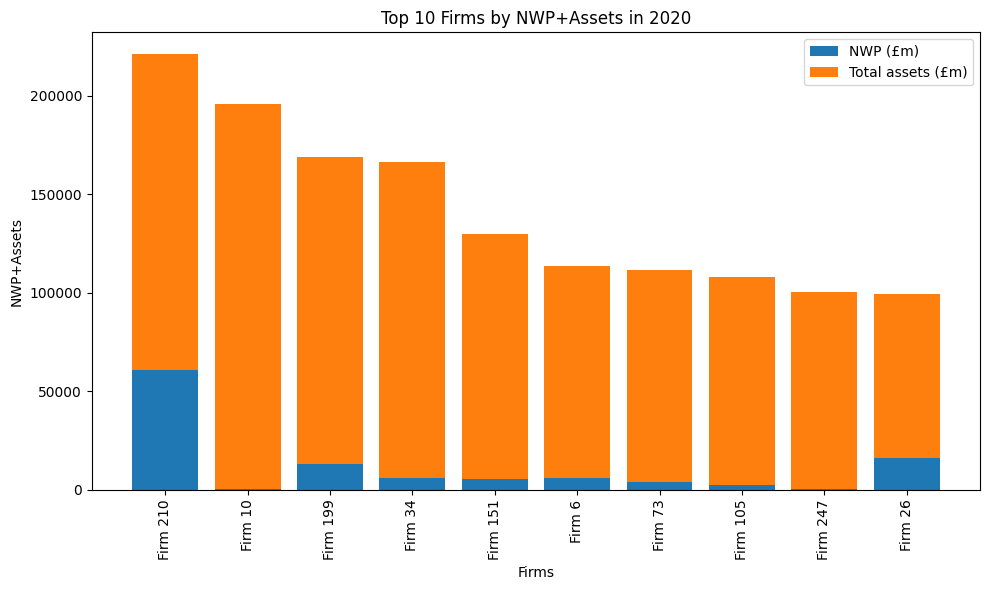

In [43]:
# Set up data for plotting
firms = top_10_firms_2020['Firms']
nwp = top_10_firms_2020['NWP (£m)']
assets = top_10_firms_2020['Total assets (£m)']

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(firms, nwp, label='NWP (£m)')
plt.bar(firms, assets, bottom=nwp, label='Total assets (£m)')
plt.xlabel('Firms')
plt.ylabel('NWP+Assets')
plt.title('Top 10 Firms by NWP+Assets in 2020')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

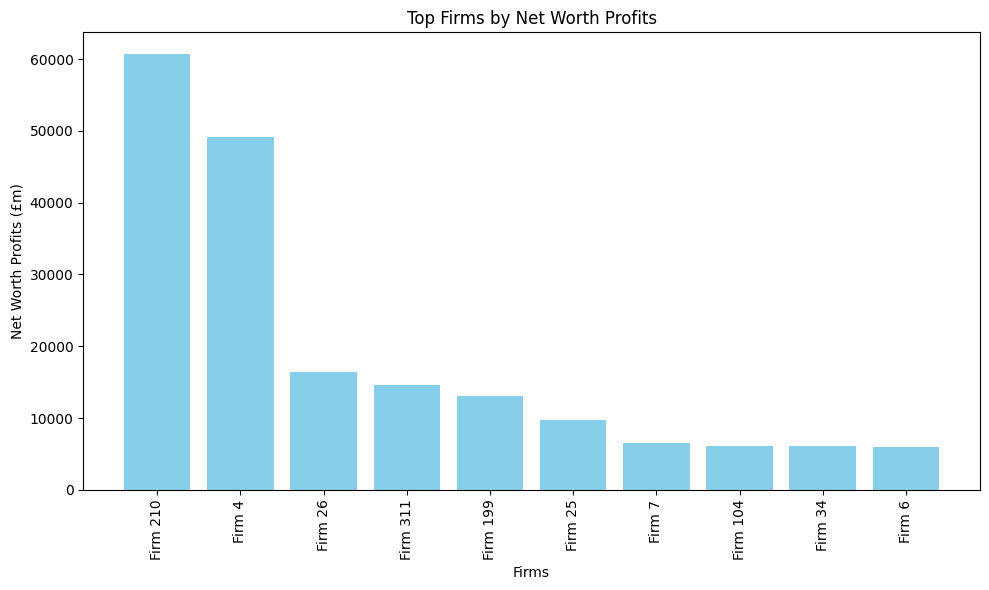

In [44]:
# Sort the DataFrame by NWP in descending order
sorted_df = merged_df_2020.sort_values(by='NWP (£m)', ascending=False)

# Extract the top q0 firms
top_q0_firms = sorted_df.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_q0_firms['Firms'], top_q0_firms['NWP (£m)'], color='skyblue')
plt.xlabel('Firms')
plt.ylabel('Net Worth Profits (£m)')
plt.title('Top Firms by Net Worth Profits')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [45]:
#Indicators for changing business profile: SCR coverage ratio, Net combined ratio, Gross claims incurred

def std_without_zeros(series):
    non_zero_values = series[series != 0]
    if non_zero_values.empty:
        return 0  # Return 0 if all values are zero
    else:
        return non_zero_values.std()

# Group the DataFrame by 'Firms'
grouped_df = merged_df_stripped.groupby('Firms')

# Calculate the standard deviation for each metric within each group, ignoring zero values
metrics_variation = grouped_df.agg({'SCR coverage ratio': std_without_zeros,
                                    'Net combined ratio': std_without_zeros,
                                    'Gross claims incurred (£m)': std_without_zeros})

# Get the top 5 firms with the highest variation for each metric
top_5_SCR_coverage = metrics_variation['SCR coverage ratio'].nlargest(5).index.tolist()
top_5_Net_combined = metrics_variation['Net combined ratio'].nlargest(5).index.tolist()
top_5_Gross_claims = metrics_variation['Gross claims incurred (£m)'].nlargest(5).index.tolist()

# Print the top 5 firms for each metric
print("Top 5 firms with the highest variation in SCR coverage ratio:")
print(top_5_SCR_coverage)

print("\nTop 5 firms with the highest variation in Net combined ratio:")
print(top_5_Net_combined)

print("\nTop 5 firms with the highest variation in Gross claims incurred (£m):")
print(top_5_Gross_claims)



Top 5 firms with the highest variation in SCR coverage ratio:
['Firm 278', 'Firm 190', 'Firm 146', 'Firm 177', 'Firm 27']

Top 5 firms with the highest variation in Net combined ratio:
['Firm 70', 'Firm 28', 'Firm 166', 'Firm 284', 'Firm 161']

Top 5 firms with the highest variation in Gross claims incurred (£m):
['Firm 105', 'Firm 17', 'Firm 286', 'Firm 200', 'Firm 283']


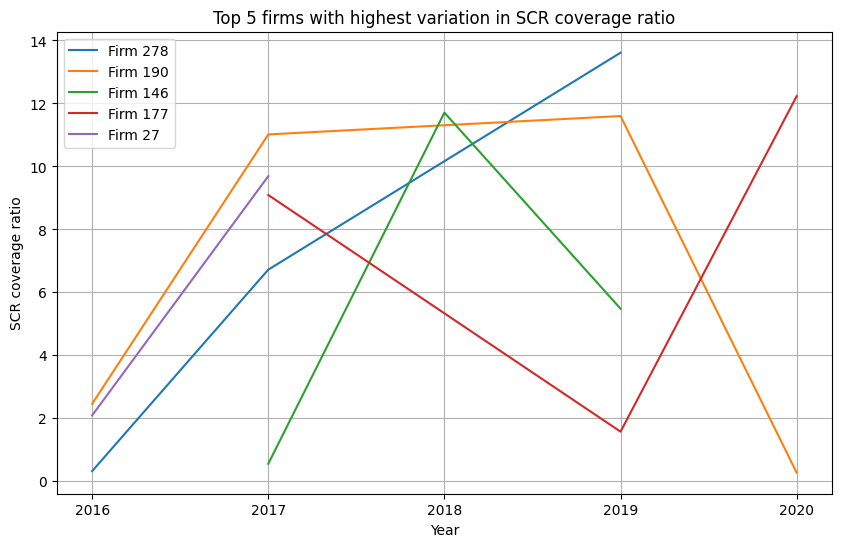

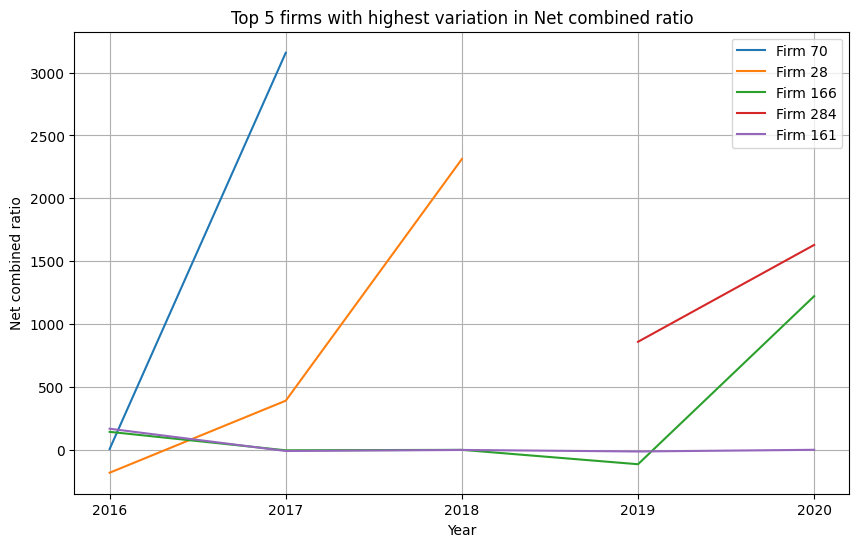

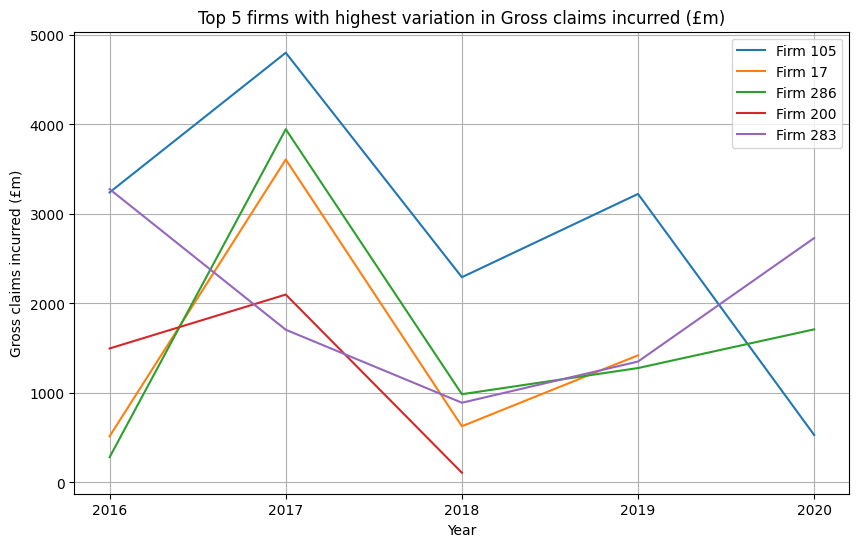

In [46]:
'''
#Note: While the above list is indicative of a changing business profile, a closer inspection of the year-on-year data is required to understand if 
the observed variation is due to expansion/industry-wise trends or irregularity. To do this, for all the short-listed firms, we should analyze a time-series chart

The following is an example of how one could do this:
'''

# Define a function to plot time series for top 5 firms
def plot_time_series(metric, top_firms):
    plt.figure(figsize=(10, 6))
    for firm in top_firms:
        # Filter DataFrame for the selected firm
        firm_data = merged_df_stripped[merged_df_stripped['Firms'] == firm]
        # Plot time series for the selected metric
        plt.plot(firm_data['Year'], firm_data[metric], label=firm)
    plt.xlabel('Year')
    plt.ylabel(metric)
    plt.title(f'Top 5 firms with highest variation in {metric}')
    plt.legend()
    plt.grid(True)
    plt.xticks(range(2016, 2021))  # Set x-axis ticks to display only years 2016 to 2020
    plt.show()

# Plot time series for SCR coverage ratio
plot_time_series('SCR coverage ratio', top_5_SCR_coverage)

# Plot time series for Net combined ratio
plot_time_series('Net combined ratio', top_5_Net_combined)

# Plot time series for Gross claims incurred
plot_time_series('Gross claims incurred (£m)', top_5_Gross_claims)


In [47]:
merged_df_stripped.columns

Index(['Firms', 'Year', 'EoF for SCR (£m)',
       'Excess of assets over liabilities (£m) [= equity]', 'GWP (£m)',
       'NWP (£m)', 'SCR (£m)', 'SCR coverage ratio', 'Total assets (£m)',
       'Total liabilities (£m)',
       'Gross BEL (inc. TPs as whole, pre-TMTP) (£m)',
       'Gross claims incurred (£m)', 'Gross combined ratio',
       'Gross expense ratio', 'Net BEL (inc. TPs as a whole, pre-TMTP) (£m)',
       'Net combined ratio', 'Net expense ratio', 'Pure gross claims ratio',
       'Pure net claims ratio'],
      dtype='object', name='Column')

In [48]:
# Calculate the average NWP
average_nwp = merged_df_2020['NWP (£m)'].mean()

# Calculate the deviation from the average for each firm
merged_df_2020=merged_df_2020.copy()
merged_df_2020['Deviation'] = merged_df_2020['NWP (£m)'] - average_nwp

# Sort the DataFrame by deviation in descending order
sorted_df = merged_df_2020.sort_values(by='Deviation', ascending=False)

# Extract the top 5 firms with significant deviation
top_5_deviation_firms = sorted_df.head(5)

# Create a comparison table
comparison_table = pd.DataFrame({
    'Firms': top_5_deviation_firms['Firms'],
    'NWP (£m)': top_5_deviation_firms['NWP (£m)'],
    'Deviation from Average (£m)': top_5_deviation_firms['Deviation']
})

# Add average NWP to the comparison table
comparison_table.loc['Average'] = ['Average', average_nwp, 0]

print(comparison_table)

            Firms      NWP (£m)  Deviation from Average (£m)
624      Firm 210  60699.953265                 59350.842740
1299       Firm 4  49204.465136                 47855.354611
894       Firm 26  16395.671694                 15046.561168
1184     Firm 311  14566.280927                 13217.170402
554      Firm 199  13133.461750                 11784.351225
Average   Average   1349.110525                     0.000000


In [49]:
# Calculate the average Net Combined Ratio
average_ncr = merged_df_2020['Net combined ratio'].mean()

# Calculate the deviation from the average for each firm
merged_df_2020=merged_df_2020.copy()
merged_df_2020['NCR Deviation'] = merged_df_2020['Net combined ratio'] - average_ncr

# Sort the DataFrame by deviation in descending order
sorted_df_ncr = merged_df_2020.sort_values(by='NCR Deviation', ascending=False)

# Extract the top 5 firms with significant deviation
top_5_deviation_firms_ncr = sorted_df_ncr.head(5)

# Create a comparison table
comparison_table_ncr = pd.DataFrame({
    'Firm': top_5_deviation_firms_ncr['Firms'],
    'Net Combined Ratio': top_5_deviation_firms_ncr['Net combined ratio'],
    'NCR Deviation from Average': top_5_deviation_firms_ncr['NCR Deviation']
})

# Add average Net Combined Ratio to the comparison table
comparison_table_ncr.loc['Average'] = ['Average', average_ncr, 0]

print(comparison_table_ncr)

             Firm  Net Combined Ratio  NCR Deviation from Average
719      Firm 228         1642.927280                 1601.657816
1029     Firm 284         1630.065399                 1588.795936
374      Firm 166         1222.879483                 1181.610019
1479      Firm 72           15.857819                  -25.411645
439      Firm 178           11.444875                  -29.824589
Average   Average           41.269464                    0.000000


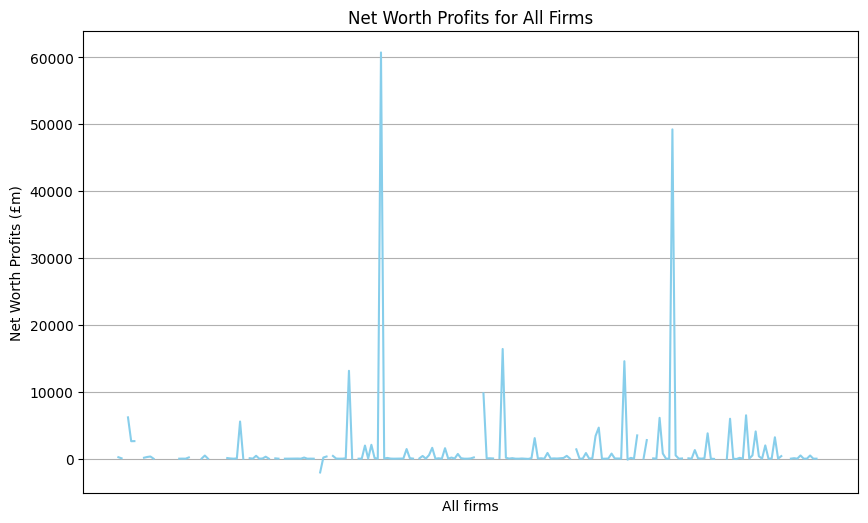

In [50]:
sorted_df = merged_df_2020.sort_index()

# Create a line graph with no specific x-axis labels
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(sorted_df)), sorted_df['NWP (£m)'], color='skyblue')
plt.xlabel('All firms')
plt.ylabel('Net Worth Profits (£m)')
plt.title('Net Worth Profits for All Firms')
plt.xticks([])  # Remove x-axis ticks
plt.grid(True)
plt.show()

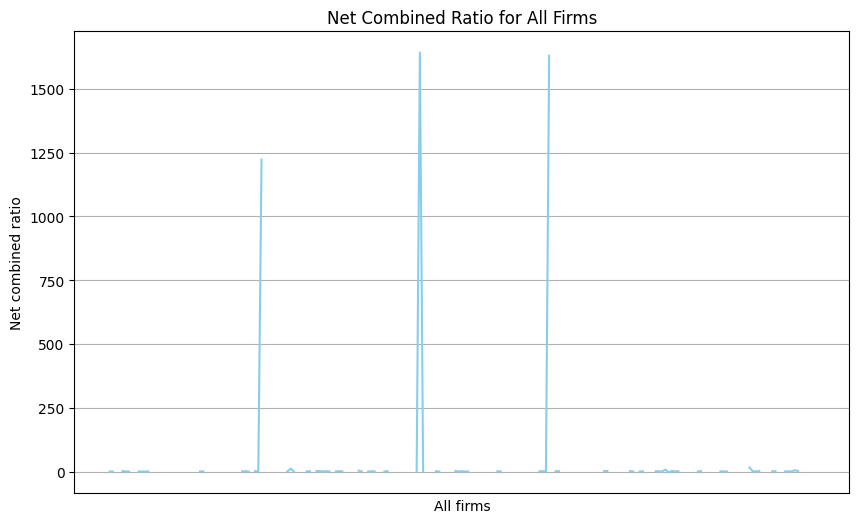

In [51]:
sorted_df = merged_df_2020.sort_index()

# Create a line graph with no specific x-axis labels
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(sorted_df)), sorted_df['Net combined ratio'], color='skyblue')
plt.xlabel('All firms')
plt.ylabel('Net combined ratio')
plt.title('Net Combined Ratio for All Firms')
plt.xticks([])  # Remove x-axis ticks
plt.grid(True)
plt.show()

In [52]:
#Outlier detection ML example for year 2020

from sklearn.ensemble import IsolationForest

# Drop rows with missing values from merged_df_2020
merged_df_2020_cleaned = merged_df_2020.dropna()

# Specify the columns to check for outliers
columns_to_check = ['NWP (£m)', 'SCR coverage ratio', 'Gross claims incurred (£m)', 'Net combined ratio']

# Extract the data for the specified columns from merged_df_2020_cleaned
data = merged_df_2020_cleaned[columns_to_check].values

# Create an instance of the Isolation Forest model
isolation_forest = IsolationForest(contamination='auto', random_state=28)

# Fit the Isolation Forest model to the data
isolation_forest.fit(data)

# Predict outliers in the data
outlier_preds = isolation_forest.predict(data)

# Identify the indices of outliers
outlier_indices = np.where(outlier_preds == -1)[0]

# Get the details of outliers
outliers = merged_df_2020_cleaned.iloc[outlier_indices]

# Print the outliers
print("Outliers detected using Isolation Forest:")
print(outliers['Firms'])



Outliers detected using Isolation Forest:
329     Firm 158
374     Firm 166
434     Firm 177
624     Firm 210
894      Firm 26
1024    Firm 283
1029    Firm 284
1299      Firm 4
1369     Firm 52
Name: Firms, dtype: object
